In [1]:
import tc_functions as fun
import credentials
dataset = fun.get_shear_stamp(
    2020, 11, 3, 0, 14.3, 277.5 - 360, 800,
    credentials.RDA_USER, credentials.RDA_PASSWORD
)


In [3]:
dataset

<xarray.DataArray '200-850hPa_wind_shear' (component: 3, lat: 58, lon: 60)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * component  (component) <U9 'magnitude' 'u' 'v'
  * lat        (lat) >f4 21.5 21.25 21.0 20.75 20.5 ... 8.25 8.0 7.75 7.5 7.25
  * lon        (lon) >f4 270.0 270.2 270.5 270.8 ... 284.0 284.2 284.5 284.8
Attributes:
    long_name:     200_850 hPa vertical wind shear
    units:         meters/second
    center_lat:    14.3
    center_lon:    -82.5
    stamp_radius:  800
    time:          2020-11-03 00:00:00

In [3]:
dataset = fun.quadrantize(dataset, -1.5, 1)

In [4]:
dataset

<xarray.DataArray '200-850hPa_wind_shear' (component: 3, lat: 58, lon: 60)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * component  (component) <U9 'magnitude' 'u' 'v'
  * lat        (lat) >f4 21.5 21.25 21.0 20.75 20.5 ... 8.25 8.0 7.75 7.5 7.25
  * lon        (lon) >f4 270.0 270.2 270.5 270.8 ... 284.0 284.2 284.5 284.8
    quadrant   (lat, lon) float64 4.0 4.0 4.0 4.0 4.0 ... 2.0 2.0 2.0 2.0 2.0
Attributes:
    long_name:           200_850 hPa vertical wind shear
    units:               meters/second
    center_lat:          14.3
    center_lon:          -82.5
    stamp_radius:        800
    time:                2020-11-03 00:00:00
    quadrant_direction:  (-1.5, 1)

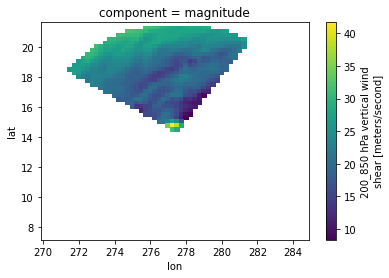

In [5]:
dataset.where(dataset.quadrant == 4)[0].plot()

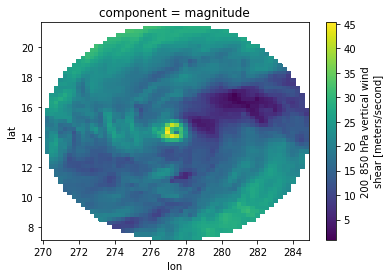

In [6]:
dataset[0].plot()

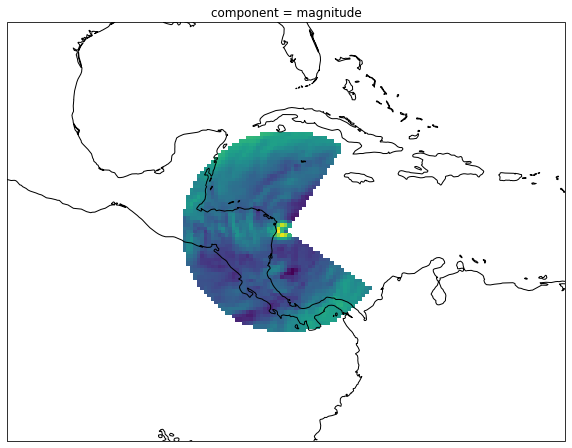

In [18]:
import cartopy.crs as ccrs
from matplotlib import pyplot as plt
import numpy as np

center_lat = dataset.attrs["center_lat"]
center_lon = dataset.attrs["center_lon"]
extent = [center_lon - 20, center_lon + 20, center_lat - 15, center_lat + 15]

plt.figure(figsize = (10, 10))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.set_extent(extent, ccrs.PlateCarree())
dataset.where(np.isin(dataset.quadrant, [1, 2, 4]))[0].plot.pcolormesh(ax = ax, transform = ccrs.PlateCarree(), x = 'lon', y = 'lat', add_colorbar = False)
ax.coastlines()
plt.show()

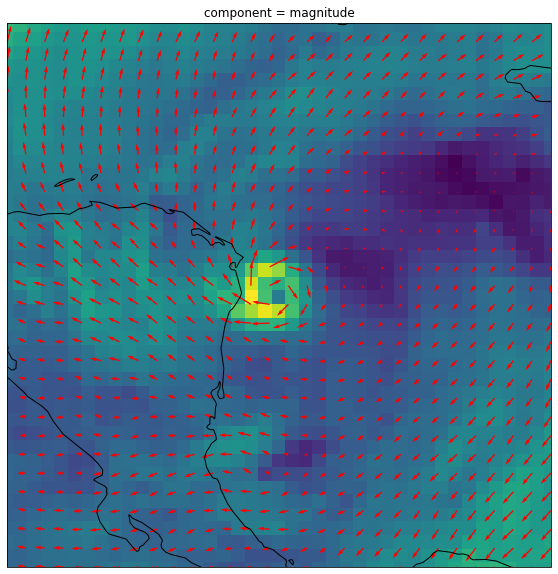

In [12]:
# Fix this plotting mess, then go back to the tc_functions and go back to circular and see if it works there. 

import cartopy.crs as ccrs
from matplotlib import pyplot as plt
import numpy as np

center_lat = dataset.attrs["center_lat"]
center_lon = dataset.attrs["center_lon"]
extent = [center_lon - 5, center_lon + 5, center_lat - 5, center_lat + 5]

lat = dataset.coords['lat'].values
lon = dataset.coords['lon'].values

lon = np.where(lon > 180, lon - 360, lon)

u = dataset[1].values
v = dataset[2].values

plt.figure(figsize = (10, 10))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.set_extent(extent, ccrs.PlateCarree())
ax.coastlines('50m')
dataset[0].plot.pcolormesh(ax = ax, transform = ccrs.PlateCarree(), x = 'lon', y = 'lat', add_colorbar = False)
ax.quiver(lon, lat, u, v, color = "red", transform = ccrs.PlateCarree(), regrid_shape = 30)
plt.show()